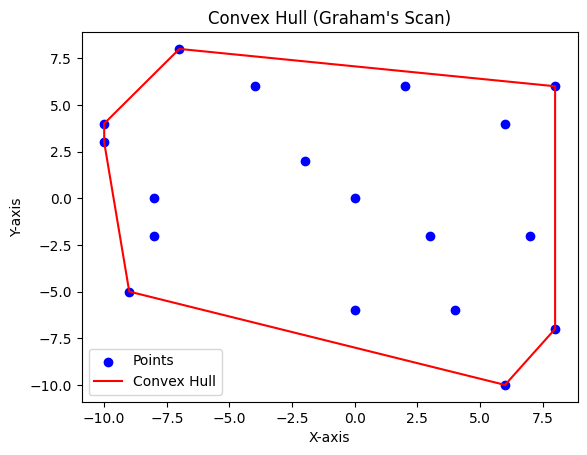

In [ ]:
import matplotlib.pyplot as plt
import math

def orientation(p, q, r):

    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def graham_scan(points):

    n = len(points)
    if n < 3:
        return points


    pivot = min(points, key=lambda point: (point[1], point[0]))


    sorted_points = sorted(points, key=lambda point: (math.atan2(point[1] - pivot[1], point[0] - pivot[0]), point))


    hull = [pivot, sorted_points[0], sorted_points[1]]

    for i in range(2, n):
        while len(hull) > 1 and orientation(hull[-2], hull[-1], sorted_points[i]) != -1:
            hull.pop()
        hull.append(sorted_points[i])

    return hull


points = [(-7,8), (-4,6), (2,6), (6,4), (8,6), (7,-2), (4,-6), (8,-7),(0,0), (3,-2),(6,-10),(0,-6),(-9,-5),(-8,-2),(-8,0),(-10,3),(-2,2),(-10,4)]
convex_hull_graham = graham_scan(points)


x, y = zip(*points)
hull_x, hull_y = zip(*convex_hull_graham)

plt.scatter(x, y, c='blue', label='Points')
plt.plot(hull_x + (hull_x[0],), hull_y + (hull_y[0],), c='red', label='Convex Hull')

plt.title('Convex Hull (Graham\'s Scan)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


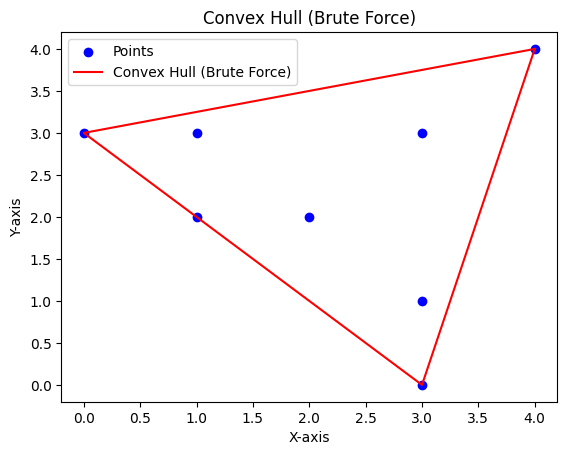

In [ ]:
import matplotlib.pyplot as plt

def orientation(p, q, r):

    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def on_segment(p, q, r):

    return (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and
            q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1]))

def brute_force_convex_hull(points):

    n = len(points)
    convex_hull = []

    for i in range(n):
        for j in range(i + 1, n):
            valid = True
            for k in range(n):
                if k != i and k != j:
                    if orientation(points[i], points[j], points[k]) == -1:
                        valid = False
                        break
            if valid:
                convex_hull.append(points[i])
                convex_hull.append(points[j])

    return list(set(convex_hull))


points = [(0, 3), (2, 2), (4, 4), (1, 2), (3, 1), (3, 3),  (3, 0), (1, 3)]

convex_hull_bruteforce = brute_force_convex_hull(points)

# Plot the points
x, y = zip(*points)
plt.scatter(x, y, c='blue', label='Points')

# Plot the convex hull
hull_x, hull_y = zip(*convex_hull_bruteforce)
plt.plot(hull_x + (hull_x[0],), hull_y + (hull_y[0],), c='red', label='Convex Hull (Brute Force)')

plt.title('Convex Hull (Brute Force)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


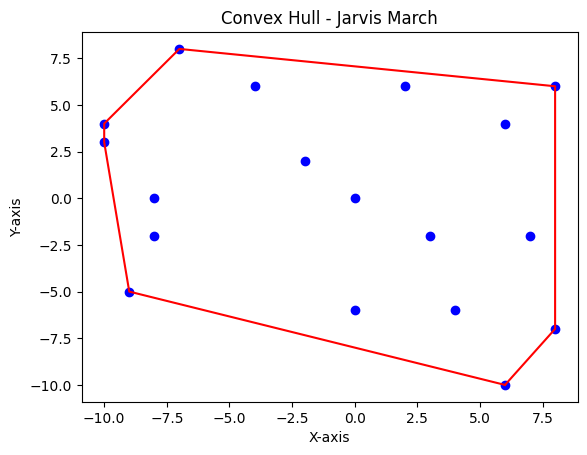

In [ ]:
import matplotlib.pyplot as plt

class ConvexHull:
    def __init__(self):
        self.points = []
        self.convex_hull = []

    def add_point(self, x, y):
        self.points.append((x, y))

    def jarvis_march(self):
        n = len(self.points)
        if n < 3:
            return

        start_point = min(self.points, key=lambda p: p[1])
        current_point = start_point
        self.convex_hull.append(current_point)

        while True:
            next_point = self.points[0]
            for candidate_point in self.points[1:]:
                if candidate_point == current_point:
                    continue
                orientation = self.orientation(current_point, next_point, candidate_point)
                if orientation < 0 or (orientation == 0 and self.distance(current_point, candidate_point) > self.distance(current_point, next_point)):
                    next_point = candidate_point

            if next_point == start_point:
                break

            self.convex_hull.append(next_point)
            current_point = next_point

    def orientation(self, p, q, r):
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    def distance(self, p1, p2):
        return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

    def plot_convex_hull(self):
        x, y = zip(*self.points)
        plt.scatter(x, y, color='blue')

        hull_x, hull_y = zip(*self.convex_hull)
        hull_x += (hull_x[0],)
        hull_y += (hull_y[0],)
        plt.plot(hull_x, hull_y, color='red')

        plt.title('Convex Hull - Jarvis March')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

if __name__ == "__main__":
    convex_hull = ConvexHull()


    points_to_add = [(-7,8), (-4,6), (2,6), (6,4), (8,6), (7,-2), (4,-6), (8,-7),(0,0), (3,-2),(6,-10),(0,-6),(-9,-5),(-8,-2),(-8,0),(-10,3),(-2,2),(-10,4)]

    for point in points_to_add:
        convex_hull.add_point(*point)

    convex_hull.jarvis_march()
    convex_hull.plot_convex_hull()


The points in Convex Hull are:
( 4 , 4 )  ( 0 , 0 )  ( 3 , 1 )  ( 0 , 3 )  

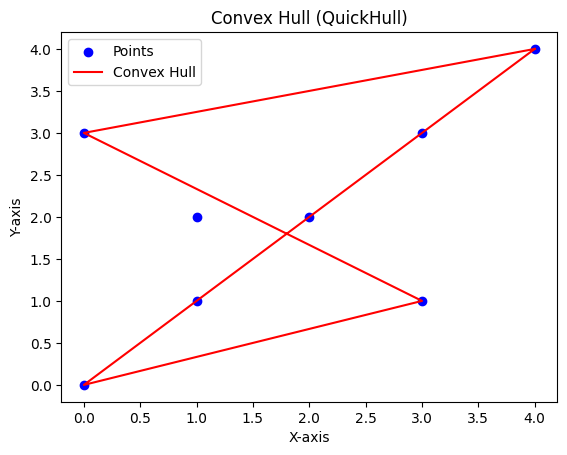

In [ ]:
import matplotlib.pyplot as plt

hull = set()

def findSide(p1, p2, p):
    val = (p[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p[0] - p1[0])
    if val > 0:
        return 1
    if val < 0:
        return -1
    return 0

def lineDist(p1, p2, p):
    return abs((p[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p[0] - p1[0]))

def quickHull(a, n, p1, p2, side):
    ind = -1
    max_dist = 0

    for i in range(n):
        temp = lineDist(p1, p2, a[i])

        if (findSide(p1, p2, a[i]) == side) and (temp > max_dist):
            ind = i
            max_dist = temp

    if ind == -1:
        hull.add("$".join(map(str, p1)))
        hull.add("$".join(map(str, p2)))
        return

    quickHull(a, n, a[ind], p1, -findSide(a[ind], p1, p2))
    quickHull(a, n, a[ind], p2, -findSide(a[ind], p2, p1))

def printHull(a):
    n = len(a)
    if (n < 3):
        print("Convex hull not possible")
        return

    min_x = 0
    max_x = 0
    for i in range(1, n):
        if a[i][0] < a[min_x][0]:
            min_x = i
        if a[i][0] > a[max_x][0]:
            max_x = i

    quickHull(a, n, a[min_x], a[max_x], 1)
    quickHull(a, n, a[min_x], a[max_x], -1)

    print("The points in Convex Hull are:")

    for element in hull:
        x = element.split("$")
        print("(", x[0], ",", x[1], ") ", end=" ")

    # Plotting the points and convex hull
    points_x, points_y = zip(*a)
    hull_x, hull_y = zip(*[map(float, point.split("$")) for point in hull])

    plt.scatter(points_x, points_y, c='blue', label='Points')
    plt.plot(hull_x + (hull_x[0],), hull_y + (hull_y[0],), c='red', label='Convex Hull')

    plt.title('Convex Hull (QuickHull)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()


a = [(0, 3), (1, 1), (2, 2), (4, 4), (0, 0), (1, 2), (3, 1), (3, 3)]
printHull(a)


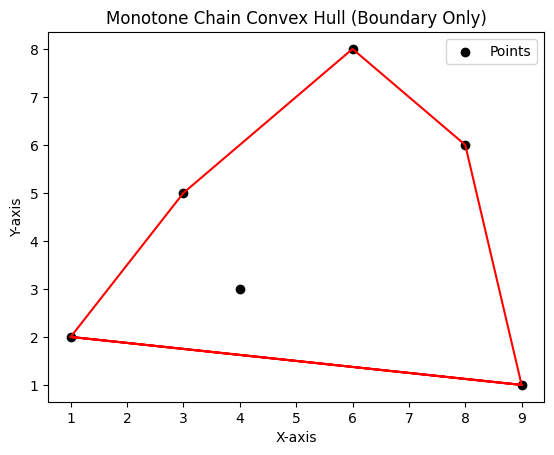

Space: 544 bytes


In [17]:
import matplotlib.pyplot as plt
import sys

def monotone_chain_convex_hull(points):
    points = sorted(set(points))

    def cross(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    ids = []
    lower = []
    for p in points:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)

    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    plt.scatter(*zip(*points), c='black', marker='o', label='Points')
    plt.plot(*zip(*lower, lower[0]), 'r-')
    plt.plot(*zip(*upper, upper[0]), 'r-')

    plt.title('Monotone Chain Convex Hull (Boundary Only)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

    space_complexity = sum(sys.getsizeof(p) for p in points) + sys.getsizeof(lower) + sys.getsizeof(upper)

    print(f"Space: {space_complexity} bytes")


points_to_plot = [(1, 2), (3, 5), (4, 3), (6, 8), (8, 6), (9, 1)]
monotone_chain_convex_hull(points_to_plot)
